In [27]:
import numpy
sigma = 0.5
nx = 51
L = 1.0
dx = L /(nx-1)
alpha = 0.00122
dt = sigma * dx**2 / alpha
 

In [28]:
def FTCS(u0,nt,dt,nx,alpha):
    u = u0.copy()
    for i in range(nt):
        u[1:-1] = u[1:-1] + alpha * dt / (dx**2) * (u[:-2]-2*u[1:-1]+u[2:])
    return u

In [29]:
x = numpy.linspace(0.0,1.0,num=nx)
u0 = numpy.zeros(nx)
u0[0] = 100.0
dx

0.02

In [30]:
nt = 100
u = FTCS(u0,nt,dt,nx,alpha)

<function matplotlib.pyplot.show(*args, **kw)>

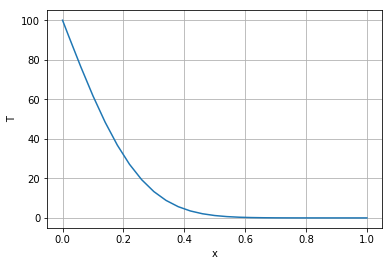

In [31]:
from matplotlib import pyplot
pyplot.xlabel('x')
pyplot.ylabel('T')
pyplot.plot(x,u)
pyplot.grid()
pyplot.show

In [32]:
def new_FTCS(u0,nt,dt,nx,alpha):
    u = u0.copy()
    for i in range(nt):
        u[1:-1] = u[1:-1] + alpha * dt / (dx**2) * (u[:-2]-2*u[1:-1]+u[2:])
    u[-1] = u[-2]+ dx * q
    return u

<function matplotlib.pyplot.show(*args, **kw)>

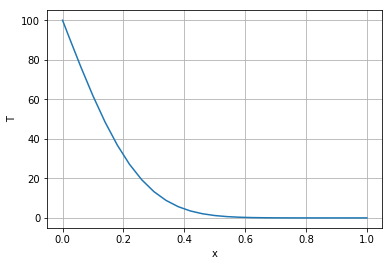

In [33]:
nt = 100
q = 0
u = new_FTCS(u0,nt,dt,nx,alpha)
from matplotlib import pyplot
pyplot.xlabel('x')
pyplot.ylabel('T')
pyplot.plot(x,u)
pyplot.grid()
pyplot.show

In [35]:
from scipy import linalg
def btcs(u0,nt,dt,dx,alpha,q=0.0):
    u = u0.copy
    sigma = alpha *dt/dx**2
    A = lhs_operator(sigma)
    for i in range(nt):
        b = rhs_vector(u, sigma,q*dx)
        u[1:-1]= numpy.linalg.solve(A,b)
        u[0]=u0[0]
        u[-1] = u[-2]+q*dx
    return u

In [36]:
def lhs_operator(N,sigma):
    D = numpy.diag((2.0 + 1.0 / sigma) * numpy.ones(N))
    # Setup the Neumann condition for the last element.
    D[-1, -1] = 1.0 + 1.0 / sigma
    # Setup the upper diagonal of the operator.
    U = numpy.diag(-1.0 * numpy.ones(N - 1), k=1)
    # Setup the lower diagonal of the operator.
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k=-1)
    # Assemble the operator.
    A = D + U + L
    return A

In [38]:
def rhs_vector(T, sigma, qdx):
    b = T[1:-1] / sigma
    # Set Dirichlet condition.
    b[0] += T[0]
    # Set Neumann condition.
    b[-1] += qdx
    return b
btcs(u0,nt,dt,dx,alpha,q=0.0)

SyntaxError: invalid character in identifier (<ipython-input-38-5a5b15ba2779>, line 8)